### Neural Nets

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
nets_shape = [10,5]
input_size = 2
output_size = 2    #2

In [14]:
def oneHot(pred,n_class):
    m = pred.shape[0]
    oht = np.zeros((m,n_class))
    oht[np.arange(m),pred] = 1
    return oht

def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    if z>0:
        return z
    else:
        return 0

def softMax(z):
    num = np.exp(z)
    den = np.sum(np.exp(z),axis = 1)
    m = den.shape[0]
    den = den.reshape(m,1)
    return num/den

In [15]:
class Model:
    def __init__(self,input_size,nets_shape,output_size):
        #np.random.seed(0)
        self.input_size = input_size
        self.nets_shape = nets_shape
        self.output_size = output_size
        
        self.layers = {}
        
        self.layers['w1'] = np.random.random((input_size,nets_shape[0]))
        self.layers['b1'] = np.random.random((1,nets_shape[0]))
        
        #loop here for multiple hidden layers(post testing on dataset with keras)
        self.layers['w2'] = np.random.random((nets_shape[0],nets_shape[1]))
        self.layers['b2'] = np.random.random((1,nets_shape[1]))
        
        self.layers['w3'] = np.random.random((nets_shape[1],output_size))
        self.layers['b3'] = np.random.random((1,output_size))
        
    
    def forward(self,X_train):
        
        z1 = np.dot(X_train,self.layers['w1']) + self.layers['b1']
        a1 = sigmoid(z1)
        
        z2 = np.dot(a1,self.layers['w2']) + self.layers['b2']
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.layers['w3']) + self.layers['b3']
        y_ = softMax(z3)
        
        self.activations = (a1,a2,y_)
        self._z = (z1,z2,z3)

        return y_
        
        
    def backward(self,X_train,Y_train,learning_rate):
        
        m = X_train.shape[0]
        a1,a2,y_ = self.activations
        z1,z2,z3 = self._z
        layers = self.layers

        y_oht = oneHot(Y_train,self.output_size)
        
        #output layer
        delta3 = y_ - y_oht
        dw3 = np.dot(a2.T,delta3)/float(m)
        db3 = np.mean(delta3,axis = 0)
        
        #Hidden layers
        delta2 = (np.dot(delta3,layers['w3'].T))*(1-(np.tanh(z2)**2))
        dw2 = np.dot(a1.T,delta2)/float(m)
        db2 = np.mean(delta2,axis = 0)
            
        delta1 = (np.dot(delta2,layers['w2'].T))*(1-(np.tanh(z1)**2))
        dw1 = np.dot(X_train.T,delta1)/float(m)
        db1 = np.mean(delta1,axis = 0)
            
        self.layers['w3'] -= learning_rate*dw3
        self.layers['w2'] -= learning_rate*dw2
        self.layers['w1'] -= learning_rate*dw1
        
        self.layers['b3'] -= learning_rate*db3
        self.layers['b2'] -= learning_rate*db2
        self.layers['b1'] -= learning_rate*db1
    
    def train(self,X_train,Y_train,learning_rate,epochs):
        loss = []
        
        for e in range(epochs):
            y_ = self.forward(X_train)
            y_oht = oneHot(Y_train,self.output_size)
            l = -1*np.mean(np.sum((y_oht*np.log(y_)),axis = 1),axis = 0)
            loss.append(l)
            self.backward(X_train,Y_train,learning_rate)
        
        return loss
              
    def predict(self,X):
        y_ = self.forward(X)
        pred = np.argmax(y_,axis = 1)
        return pred


In [16]:
from sklearn.datasets import make_moons,make_circles

In [17]:
#X,Y = make_circles(n_samples = 400,noise = 0.1,random_state = 2,factor = 0.5)
X,Y = make_moons(n_samples = 200,noise = 0.1,random_state = 2)

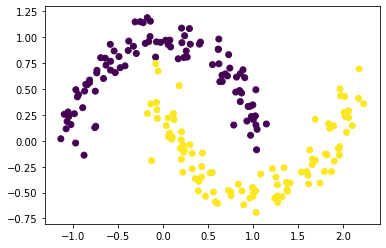

In [18]:
plt.scatter(X[:,0],X[:,1],c = Y)

In [28]:
model = Model(input_size,nets_shape,output_size)

In [29]:
loss = model.train(X,Y,0.9,500)

In [30]:
pred = model.predict(X)

In [31]:
np.sum(pred == Y)/Y.shape[0]

0.99

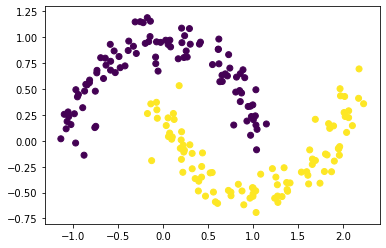

In [32]:
plt.scatter(X[:,0],X[:,1],c = pred)

In [33]:
print(pred)

[1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1]


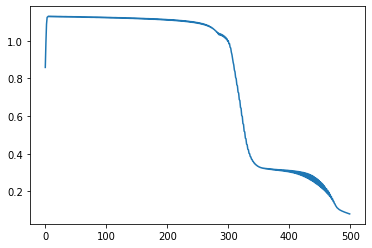

In [34]:
plt.plot(loss)

In [35]:
def visualizeClassifier(start,end,n,model,X):
    x = np.linspace(start,end,n)
    y = np.linspace(start,end,n)
    X_ = []
    for i in range(n):
        for j in range(n):
            X_.append([x[i],y[j]])
    X_ = np.array(X_)
    X_.reshape(-1,2)
    pred_ = model.predict(X_)
    pred = model.predict(X)
    plt.scatter(X_[:,0],X_[:,1],c = pred_)
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()

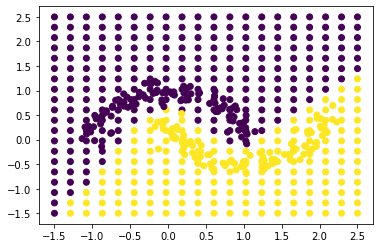

In [36]:
visualizeClassifier(-1.5,2.5,20,model,X)

In [37]:
start = -1.5
end = 2.5
n = 20

def analyse(X,Y,learning_rate = 0.9,epochs = 1000):
    model = Model(input_size,nets_shape,output_size)
    loss = model.train(X,Y,learning_rate,epochs)
    pred = model.predict(X)
    acc = np.sum(pred == Y)/Y.shape[0]
    
    #printing,Plotting
    print('acc = ',acc)
    print("Actual")
    plt.scatter(X[:,0],X[:,1],c = Y)
    plt.show()
    print("Classifier Visualisation")
    visualizeClassifier(-1.5,2.5,20,model,X)
    plt.show()
    print("Loss Fn.")
    plt.plot(loss)
    plt.show()
    print("Prediction")
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()

In [38]:
X,Y = make_moons(n_samples = 200,noise = 0.1,random_state = 2)

acc =  1.0
Actual


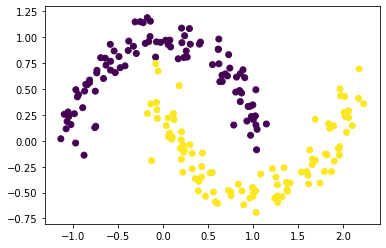

Classifier Visualisation


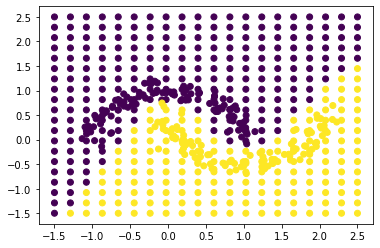

Loss Fn.


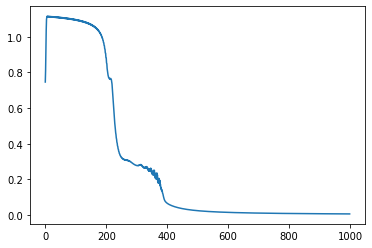

Prediction


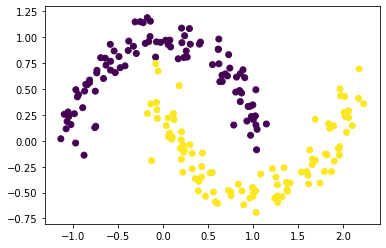

In [39]:
analyse(X,Y)

In [40]:
from sklearn.datasets import make_circles

In [41]:
X,Y = make_circles(n_samples = 400,noise = 0.1,random_state = 2)

acc =  0.885
Actual


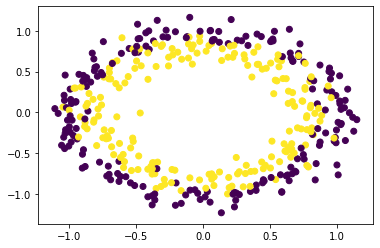

Classifier Visualisation


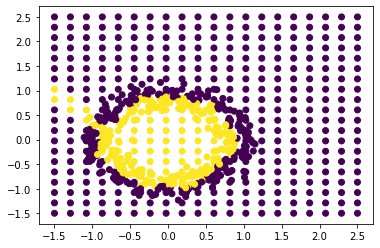

Loss Fn.


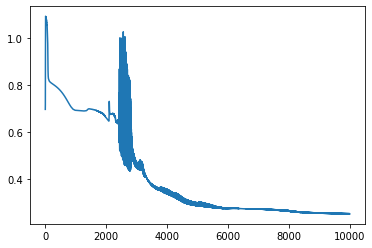

Prediction


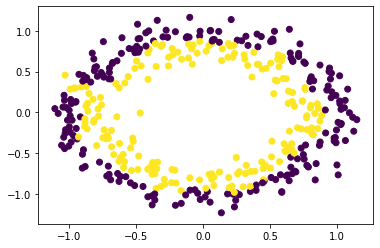

In [42]:
analyse(X,Y,epochs = 10000)

In [43]:
from sklearn.datasets import make_classification

In [46]:
X,Y = make_classification(n_samples = 500,n_classes = 2,n_features = 2,n_informative = 2,n_redundant = 0,random_state = 2)

acc =  0.96
Actual


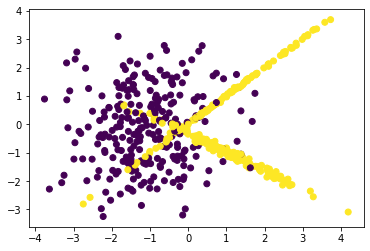

Classifier Visualisation


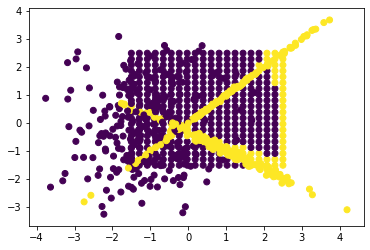

Loss Fn.


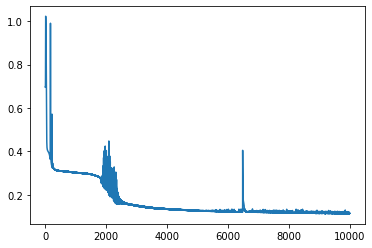

Prediction


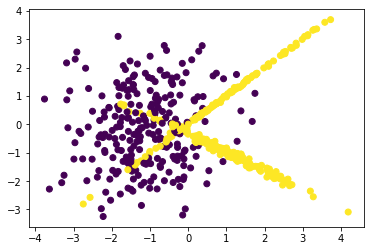

In [47]:
analyse(X,Y,epochs = 10000)

In [ ]:
#neural Network implementation with keras library

### Keras

In [2]:
import tensorflow 
from tensorflow import keras

In [3]:
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [4]:
from keras.optimizers import Adam

In [5]:
adam = Adam()

In [6]:
model = Sequential()
model.add(Dense(40,input_shape = (2,)))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.summary()
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
Total params: 597
Trainable params: 597
Non-trainable params: 0
_________________________________________________________________


In [7]:
from sklearn.datasets import make_moons,make_circles
from keras.utils import to_categorical

In [8]:
X,Y = make_circles(n_samples = 200,noise = 0.1,random_state = 2)

In [9]:
y_oht = to_categorical(Y,2)

In [10]:
#remove comment to train
#hist = model.fit(X,y_oht,epochs = 500,validation_split = 0.2)

In [13]:
pred = model.predict(X)

In [ ]:
pred = np.argmax(pred,axis = 1)
print(pred)

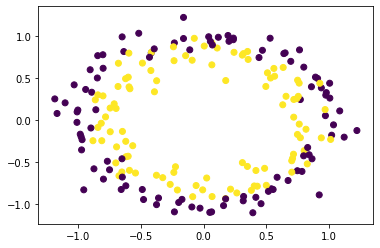

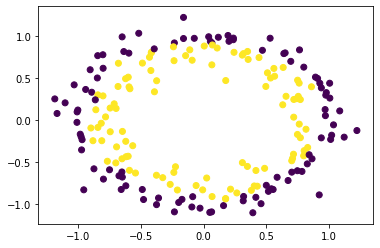

In [138]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()
plt.scatter(X[:,0],X[:,1],c = pred)

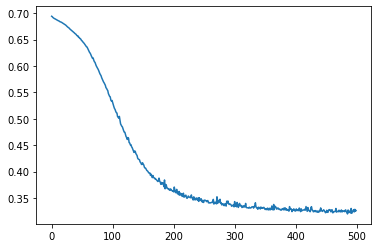

In [139]:
plt.plot(hist.history['loss'])

In [140]:
print(l)

binary_crossentropy


In [149]:
start = -1.5
end = 1.5
n = 20
def visualizeKerasClassifier(start,end,n,model,hist,X,Y):
    x = np.linspace(start,end,n)
    y = np.linspace(start,end,n)
    X_ = []
    for i in range(n):
        for j in range(n):
            X_.append([x[i],y[j]])
    X_ = np.array(X_)
    X_.reshape(-1,2)
    pred_ = np.argmax(model.predict(X_),axis = 1)
    pred = np.argmax(model.predict(X),axis = 1)
    acc = np.sum(pred == Y)/Y.shape[0]
    print('acc = ', acc)
    plt.scatter(X_[:,0],X_[:,1],c = pred_)
    plt.show()
    plt.scatter(X[:,0],X[:,1],c = pred)
    plt.show()
    plt.scatter(X[:,0],X[:,1],c = Y)
    plt.show()
    plt.plot(hist.history['loss'],c = 'blue',label = 'loss')
    plt.plot(hist.history['accuracy'],c = 'yellow',label = 'acc')
    plt.show()

acc =  0.865


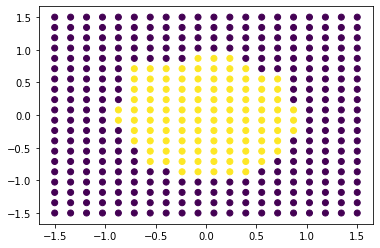

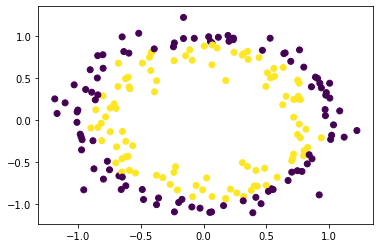

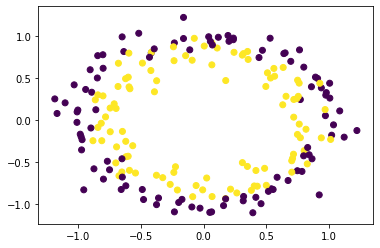

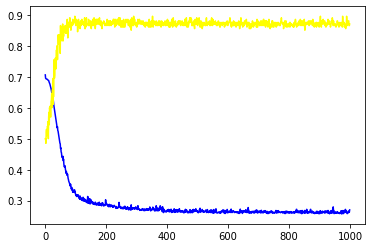

In [150]:
visualizeKerasClassifier(start,end,n,model,hist,X,Y)

In [151]:
def makeModel():
    model = Sequential()
    model.add(Dense(40,input_shape = (2,)))
    model.add(Dense(10,activation = 'relu'))
    model.add(Dense(5,activation = 'relu'))
    model.add(Dense(2,activation = 'softmax'))
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [152]:
model = makeModel()

In [153]:
X,Y = make_circles(n_samples = 200,noise = 0.1,random_state = 2)

In [154]:
def trainKerasModel(X,Y,epoch = 1000):
    y_oht = oneHot(Y,2)
    model = makeModel()
    hist = model.fit(X,y_oht,epochs = epoch)
    return model,hist

In [48]:
#remove comment to train
#model,hist = trainKerasModel(X,Y)

acc =  0.885


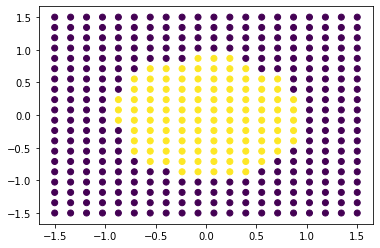

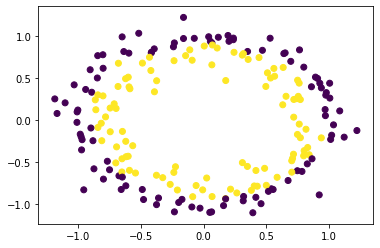

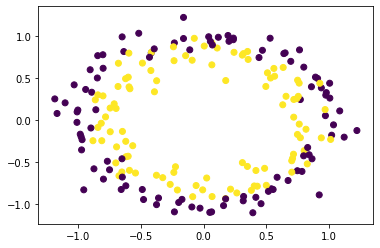

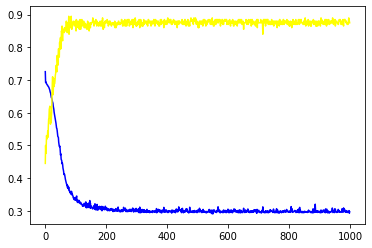

In [156]:
visualizeKerasClassifier(start,end,n,model,hist,X,Y)